### Import packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import data

In [19]:
data = pd.read_csv(r'/content/drive/MyDrive/Energy_Demand-Forecast/Electricity Consumption.csv')

In [20]:
data.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [22]:
# Transform data to time series data
data['DATE'] = pd.to_datetime(data.DATE,format='%m/%d/%Y')

data.set_index(data.DATE,inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


In [24]:
#create month and year columns forEDA
data['Month'] = data.DATE.dt.month
data['Year']= data.DATE.dt.year

In [25]:
data

,DATE,Electricty_Consumption_in_TW,Month,Year
DATE,,,,
1973-01-01,1973-01-01,35.9728,1,1973
1973-02-01,1973-02-01,36.1334,2,1973
1973-03-01,1973-03-01,35.0625,3,1973
1973-04-01,1973-04-01,33.8416,4,1973
1973-05-01,1973-05-01,33.5107,5,1973
...,...,...,...,...
2019-05-01,2019-05-01,97.5860,5,2019
2019-06-01,2019-06-01,110.8580,6,2019
2019-07-01,2019-07-01,122.1014,7,2019


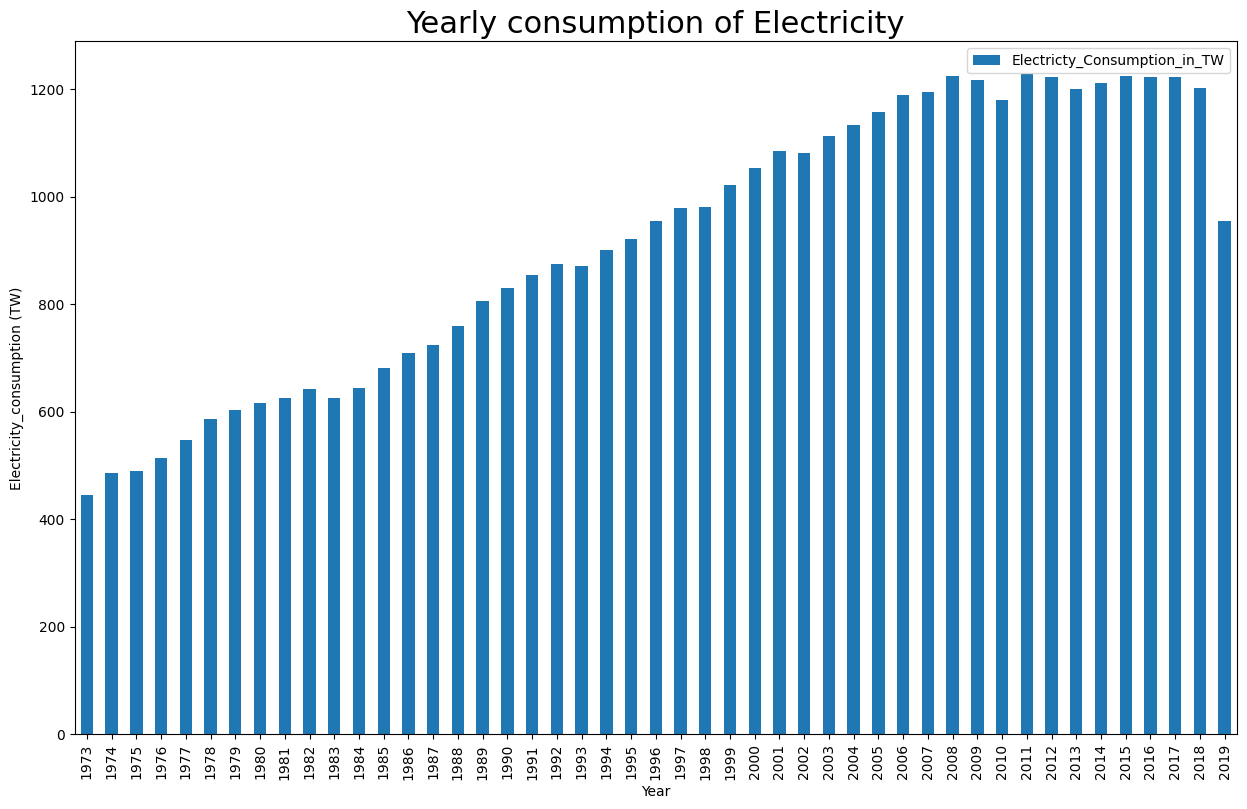

In [26]:
data.groupby('Year')[['Electricty_Consumption_in_TW']].sum().plot(kind='bar',figsize=(15,9))
plt.title('Yearly consumption of Electricity',fontsize=22)
plt.ylabel('Electricity_consumption (TW)')
plt.show()

In [27]:
month_trend = data.groupby('Month')[['Electricty_Consumption_in_TW']].sum()

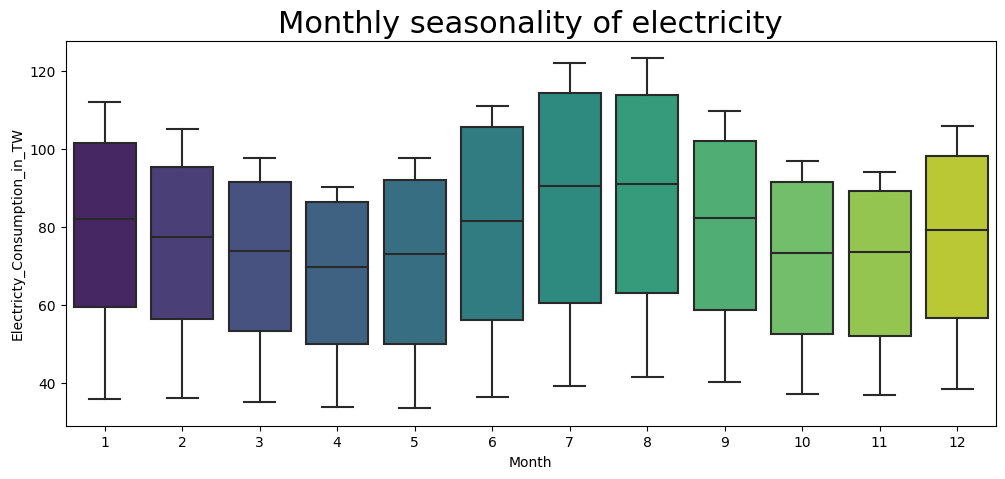

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=data.Month,y=data.Electricty_Consumption_in_TW,palette='viridis')
plt.title('Monthly seasonality of electricity',fontsize=22)
plt.show()


In [29]:
#check for missing values
pd.pivot_table(index='Year',columns='Month',values='Electricty_Consumption_in_TW',data=data)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


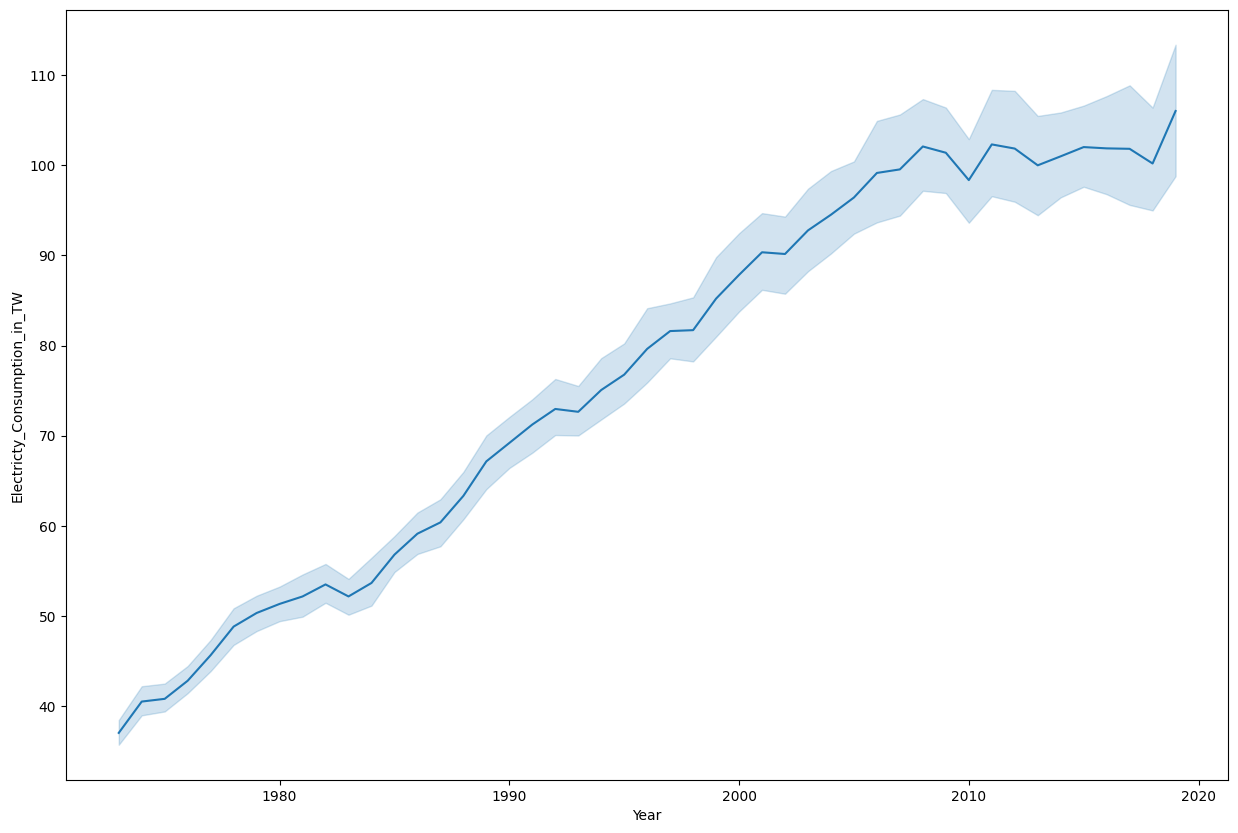

In [30]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data.Year,y=data.Electricty_Consumption_in_TW)
plt.show()


## Analysis :
1. The electricity consumption increases over the year.
2. We can see clear monthly seasonality.The demand of electricity is high in the month of July and August.
3. The mean is not constant in this case we can see the upward trend. Thus we need to make the data stationary.

In [31]:
time_series = data.Electricty_Consumption_in_TW

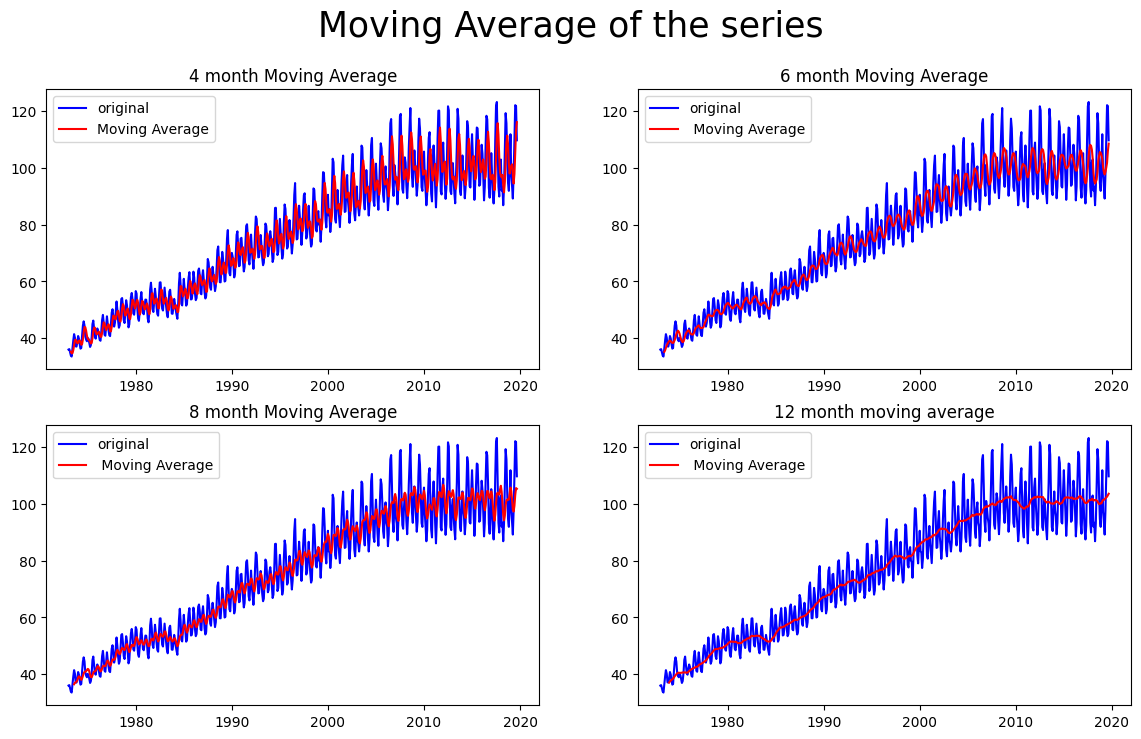

In [32]:
# Rolling average of series
fig,axes = plt.subplots(2,2,sharex=False,sharey=False)
fig.set_figwidth(14)
fig.set_figheight(8)
fig.suptitle('Moving Average of the series',fontsize=25)

axes[0][0].plot(time_series.index,time_series,label='original',color='blue')
axes[0][0].plot(time_series.index,time_series.rolling(window=4).mean(),label='Moving Average',color='Red')
axes[0][0].legend()
axes[0][0].title.set_text('4 month Moving Average')

axes[0][1].plot(time_series.index,time_series,label='original',color='blue')
axes[0][1].plot(time_series.index,time_series.rolling(window=6).mean(),label=' Moving Average',color='Red')
axes[0][1].legend()
axes[0][1].title.set_text('6 month Moving Average')



axes[1][0].plot(time_series.index,time_series,label='original',color='blue')
axes[1][0].plot(time_series.index,time_series.rolling(window=8).mean(),label=' Moving Average',color='Red')
axes[1][0].legend()
axes[1][0].title.set_text('8 month Moving Average')


axes[1][1].plot(time_series.index,time_series,label='original',color='blue')
axes[1][1].plot(time_series.index,time_series.rolling(window=12).mean(),label=' Moving Average',color='Red')
axes[1][1].legend()
plt.title('12 month moving average')

plt.show()




### Decomposition

In [33]:

decom = seasonal_decompose(time_series,model='multiplicative')

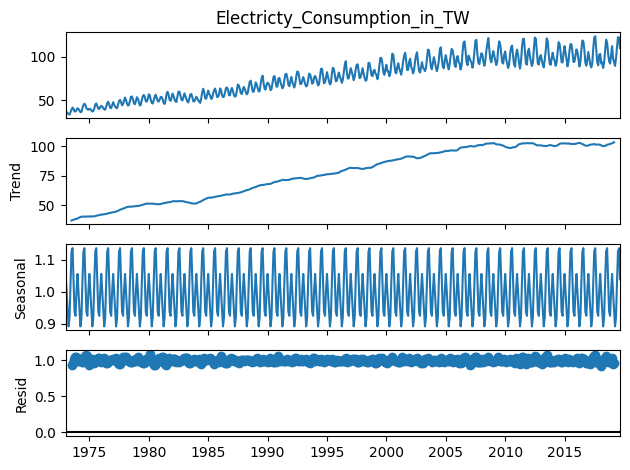

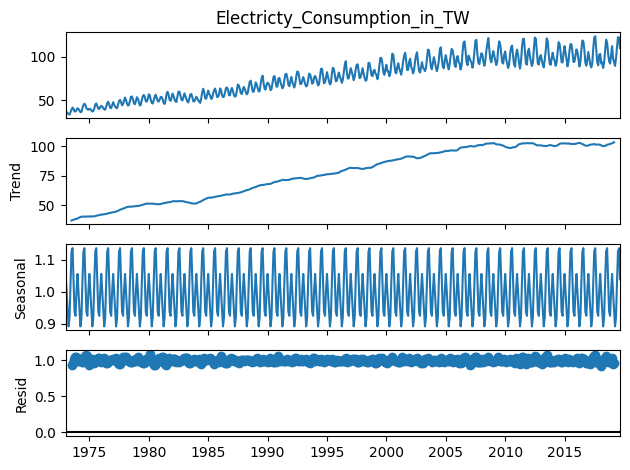

In [34]:
decom.plot()

In [35]:
#seperating seasonal,trend and residual components
pd.concat([decom.observed,decom.seasonal,decom.trend,decom.resid],axis=1).head(12)

,Electricty_Consumption_in_TW,seasonal,trend,resid
DATE,,,,
1973-01-01,35.9728,1.055358,NaN,NaN
1973-02-01,36.1334,0.996086,NaN,NaN
1973-03-01,35.0625,0.945337,NaN,NaN
1973-04-01,33.8416,0.890877,NaN,NaN
1973-05-01,33.5107,0.918780,NaN,NaN
1973-06-01,36.4823,1.030843,NaN,NaN
1973-07-01,39.1412,1.125749,37.223388,0.934064
1973-08-01,41.4137,1.136105,37.576442,0.970085
1973-09-01,40.1639,1.038776,37.850562,1.021507


### ADF Test - Test to check data is stationary or non-stationary

In [36]:
adfuller(time_series)

(-1.7405933729832581,
 0.41032816044686105,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

#### since p value is greater than 0.05 we fail to reject the null hypothesis and can say that data is non stationary.

In [37]:
ts_ln = np.log(time_series)

In [38]:
adfuller(ts_ln)

(-3.001866678891567,
 0.03472044330065586,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

In [39]:
adfuller(time_series.diff(1).dropna())

(-7.941665363981173,
 3.3013438021516752e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

In [40]:
ts_diff = ts_ln.diff(1).dropna()

<Axes: xlabel='DATE'>

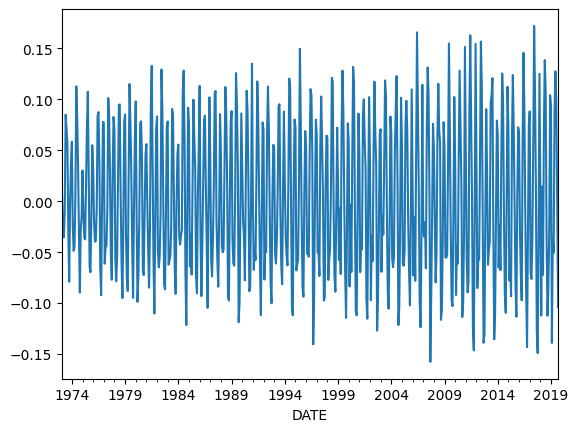

In [41]:
ts_diff.plot()

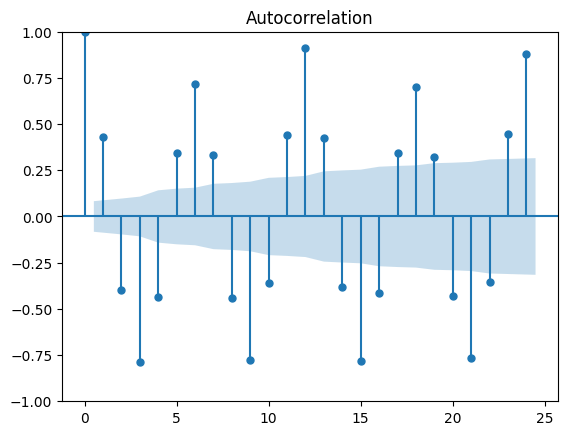

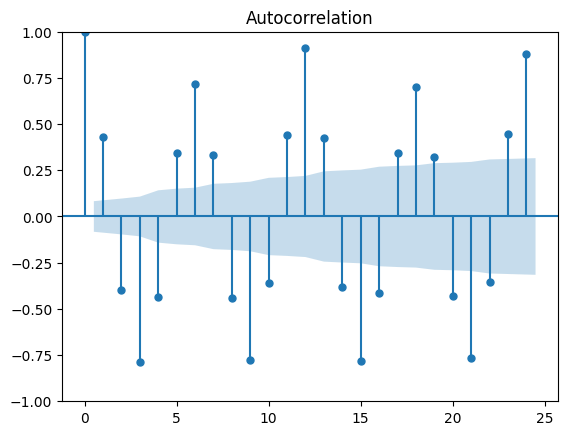

In [42]:
#ACF Plot
smt.graphics.plot_acf(ts_diff,lags=24)

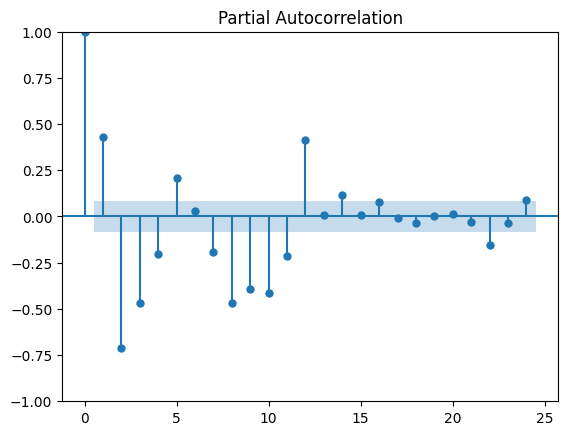

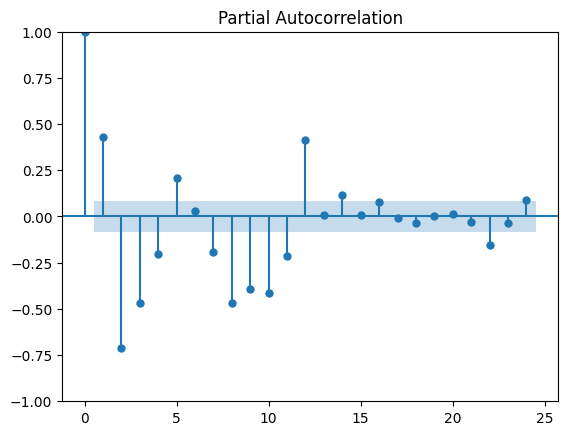

In [43]:
#PACF Plot
smt.graphics.plot_pacf(ts_diff,lags=24)

### Fitting a model

#### ETS Model

In [44]:
ts_ln

DATE
1973-01-01    3.582763
1973-02-01    3.587218
1973-03-01    3.557132
1973-04-01    3.521691
1973-05-01    3.511865
                ...   
2019-05-01    4.580734
2019-06-01    4.708250
2019-07-01    4.804852
2019-08-01    4.802187
2019-09-01    4.697923
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [45]:
train = ts_ln[:'2017-09-01']
test = ts_ln['2017-10-01':]

In [46]:
ets_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.1,
                                                                                           smoothing_trend=0.2,
                                                                                           smoothing_seasonal=0.5)

In [47]:
print(ets_model.summary())

                           ExponentialSmoothing Model Results                           
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  537
Model:                     ExponentialSmoothing   SSE                              0.469
Optimized:                                 True   AIC                          -3749.979
Trend:                           Multiplicative   BIC                          -3681.403
Seasonal:                        Multiplicative   AICC                         -3748.658
Seasonal Periods:                            12   Date:                 Fri, 06 Oct 2023
Box-Cox:                                  False   Time:                         05:24:11
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.100

In [48]:
#Foward Testing
forecast = np.exp(ets_model.forecast(steps=24))
actual = np.exp(test)

In [49]:
#Backward Testing
fitted = np.exp(ets_model.fittedvalues['2016-09-01':])
original = np.exp(train['2016-09-01':])

In [50]:
print('MAPE_Train :',np.mean(np.abs((original-fitted)/original)))
print('MAPE_Test :',np.mean(np.abs((actual-forecast)/actual)))

MAPE_Train : 0.040432974677990854
MAPE_Test : 0.024232019088533247


#### SARIMA Model

In [51]:
#Finding best parameters for the model(p,d,q)(P,D,Q,T)
#from the acf and pacf plot the value of q=1 and p=1
p = 1
q = 1
d = 1

P = 1
D = 0
Q = 1
T = 12





In [52]:
sarima_model = smt.SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,
           enforce_stationarity=False).fit()

In [53]:
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  537
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1289.004
Date:                            Fri, 06 Oct 2023   AIC                          -2568.009
Time:                                    05:24:13   BIC                          -2546.720
Sample:                                01-01-1973   HQIC                         -2559.670
                                     - 09-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6327      0.056     11.268      0.000       0.523       0.743
ma.L1         -0.8948      0.034   

In [54]:
#Foward Testing
forecast_sar = np.exp(sarima_model.forecast(steps=24))
actual_sar = np.exp(test)


In [55]:
#Backward Testing
fitted_sar = np.exp(sarima_model.fittedvalues['2016-09-01':])
original_sar = np.exp(train['2016-09-01':])


In [56]:
print('MAPE_Train :',np.mean(np.abs((original_sar-fitted_sar)/original_sar)))
print('MAPE_Test :',np.mean(np.abs((actual_sar-forecast_sar)/actual_sar)))

MAPE_Train : 0.02205488874207737
MAPE_Test : 0.024437056737709156


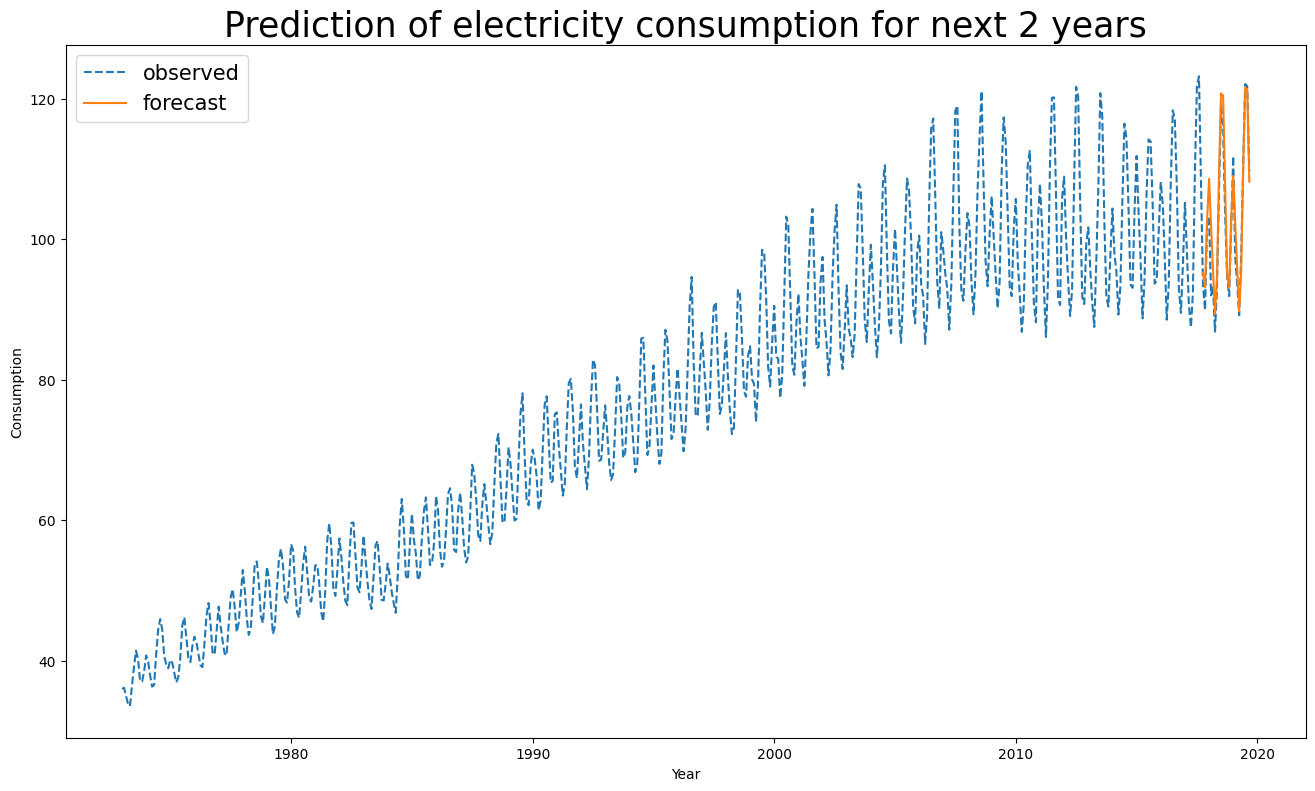

In [57]:
plt.figure(figsize=(16,9))
plt.plot(time_series, '--', label='observed')
plt.plot(forecast_sar, '-', label='forecast')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend(fontsize=15)
plt.title('Prediction of electricity consumption for next 2 years',fontsize=25)
plt.show()

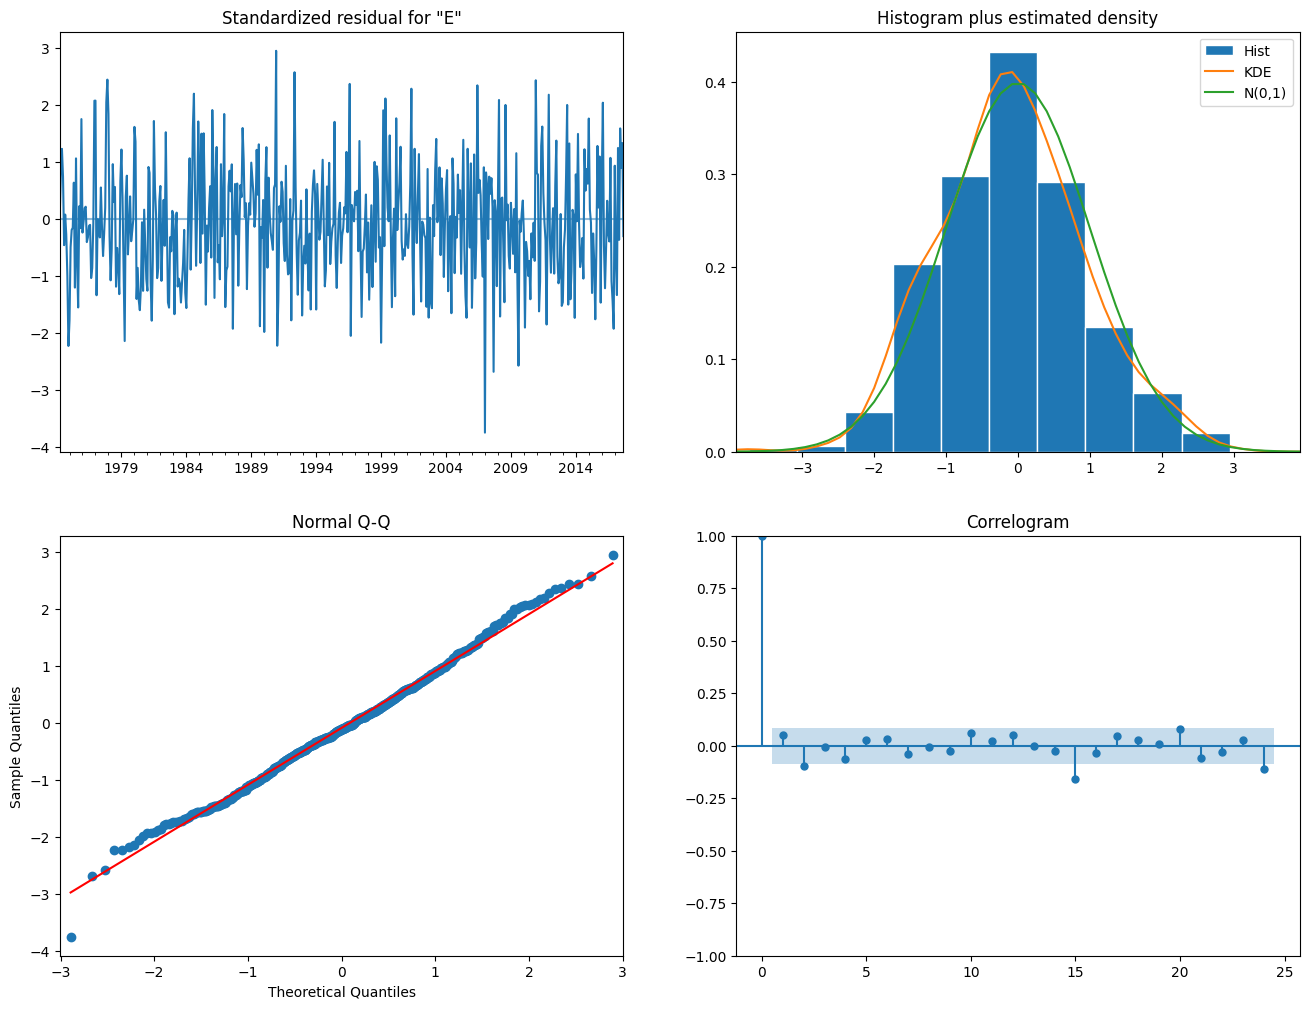

In [58]:
sarima_model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()

### From the above residual plot,
The lag plot indicates that the residuals are not autocorrelated at lag 1.
The histogram and normal probability plot indicate that the normal distribution provides an adequate fit for this model.
Thus, we can conclude that SARIMA Model is best fit model in prediction of electricity consumption demand for next 2 years.